## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
# Display the data table for preview
mouse_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Display the data table for preview
mouse_df['Mouse ID'].value_counts()

g989    13
x402    10
a444    10
k483    10
o331    10
        ..
b447     1
x226     1
n482     1
o848     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Resource: https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p

mouse_df_cl = mouse_df[~mouse_df['Mouse ID'].isin(['g989'])]
mouse_df_cl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mouse_df_cl['Mouse ID'].value_counts()

y865    10
g316    10
a444    10
k483    10
o331    10
        ..
f932     1
o848     1
u153     1
l872     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg_summary_df = mouse_df_cl.groupby('Drug Regimen')

# Mean, median, variance, standard deviation, and SEM of the tumor volume by drug 
tumor_mean = drug_reg_summary_df['Tumor Volume (mm3)'].mean()
tumor_median = drug_reg_summary_df['Tumor Volume (mm3)'].median()
tumor_variance = drug_reg_summary_df ['Tumor Volume (mm3)'].var()
tumor_stdev = drug_reg_summary_df['Tumor Volume (mm3)'].std()
tumor_sem = drug_reg_summary_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_reg_summary_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median, 'Variance': tumor_variance,
                                    'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

drug_reg_summary_df.head()



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Data Points')

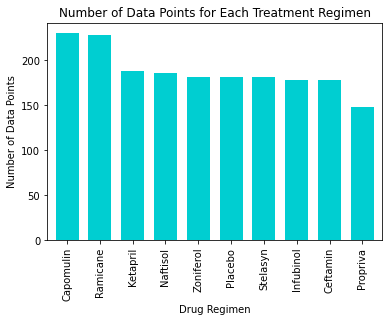

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# Pandas bar plots are categorical 


# Creat a dataframe that calcuates # of measurements taken on each drug
bar_plot = mouse_df_cl['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3, color=('darkturquoise'))

# Set labels for axes
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")

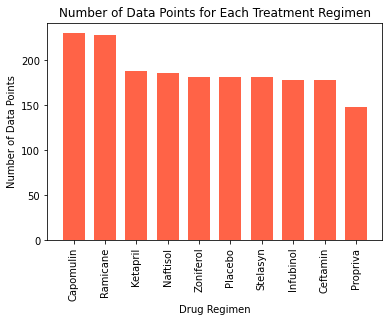

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Pyplot bar plots are numeric

# Calcuate # of measurements taken on each drug
counts = mouse_df_cl['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar plot with the length of the 'counts' series
plt.bar(x_axis, counts, width = 0.7, zorder=3, color=('tomato'))

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

plt.show()

In [9]:
# Count males and females
m_f = mouse_df_cl['Sex'].value_counts()
m_f

Male      958
Female    922
Name: Sex, dtype: int64

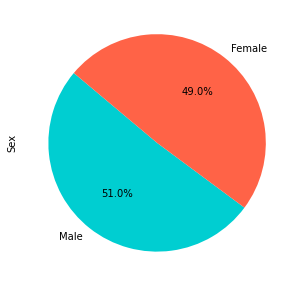

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot = m_f.plot.pie(figsize=(5, 5), colors = ["darkturquoise", "tomato"], autopct="%1.1f%%", startangle=140)

([<matplotlib.patches.Wedge at 0x7fa1230b65e0>,
 [Text(-0.7320888280116858, -0.8210030133321538, 'Female'),
  Text(0.7320888280116863, 0.8210030133321532, 'Male')],
 [Text(-0.399321178915465, -0.447819825453902, '49.0%'),
  Text(0.3993211789154652, 0.4478198254539017, '51.0%')])

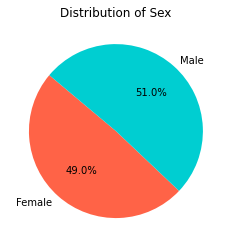

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [922, 958]

# The colors of each section of the pie chart
colors = ["tomato", "darkturquoise"]

# Add labels
plt.title("Distribution of Sex")

# Display the pie chart
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)


# Quartiles and Outliers

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a dataframe with the last (greatest) timepoint for each mouse
max_timept_df = pd.DataFrame(mouse_df_cl.groupby('Mouse ID')['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_df_cl = pd.merge(max_timept_df, mouse_df_cl, on=['Mouse ID', 'Timepoint'], how='left')
merged_mouse_df_cl

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Create a for loop to locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen:
        
    # Create a dataframe using a for loop containing the drugs listed in drug_regimen referencing the merged_mouse_df_cl 
    # (aka - the clean dataframe) by referncing the column "drug regimen" 
    drug_df = merged_mouse_df_cl.loc[merged_mouse_df_cl['Drug Regimen']== drug]
        
    # Reduce the previouslty created dataframe (drug_df)to show the final tumor volume and create a new
    # dataframe (drug_df evolves to final_volume_df)
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']

    # Will need this for the for loop and will need for box plot
    tumor_vol_data.append(values)

    # Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'{drug} Data:')
    print(f'IQR for {drug}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}') 

    # Determine outliers using upper and lower bounds
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                 (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}\n')

Capomulin Data:
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

Ramicane Data:
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

Infubinol Data:
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

Ceftamin Data:
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0



# Box Plot

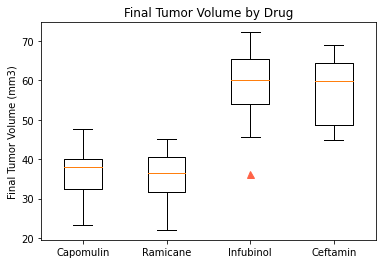

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#final_volume_df.boxplot(by='Tumor Volume (mm3)', column =['Drug Regimen'], grid = False)

flierprops = dict(marker='^', markerfacecolor='tomato', markersize=7, markeredgecolor='tomato')
plt.boxplot(tumor_vol_data, flierprops=flierprops)

#Add title/labels
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

# Line Plot

In [15]:
# Isolate Capomulin into a dataframe
capomulin_df = mouse_df_cl.loc[mouse_df_cl['Drug Regimen'] == 'Capomulin']
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


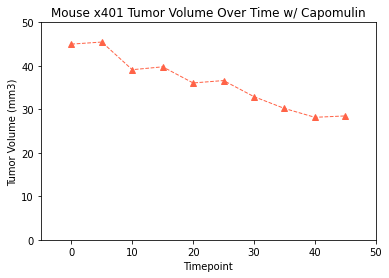

In [16]:
# Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.

# Select the mouse and create a dataframe for that mouse
mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 'x401']
mouse


# Plot the line
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], linewidth=1, marker="^", ls='--', color="tomato")

# Set limits on x and y axis
plt.xlim(-5, 50)
plt.ylim(0, 50)

# Add labels
plt.title("Mouse x401 Tumor Volume Over Time w/ Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

In [17]:
capomulin_df.head(25)              

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


# Scatter Plot

Text(0, 0.5, 'Tumor Volume (mm3)')

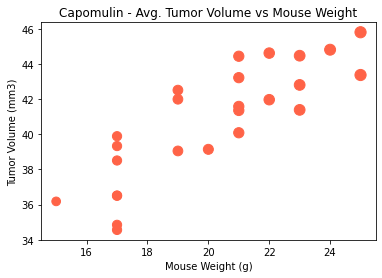

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
# This is for all mice treated with Capomulin

# Find the average tumor volume by mouse and create a dataframe
#tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

cap_mouse_df_cl = mouse_df_cl.loc[mouse_df_cl['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()

# Merge the dataframes
#cap_tv_df = pd.merge(capomulin_df, mouse_df_cl, on=['Tumor Volume (mm3)'], how='left')

x = cap_mouse_df_cl['Weight (g)']
y = cap_mouse_df_cl['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(x, y, marker="o", s = cap_mouse_df_cl['Weight (g)']*5, facecolors="tomato", edgecolors="tomato")

# Set limits on x and y axis
# plt.xlim(12, 30)
# plt.ylim(15, 50)

# Add labels
plt.title("Capomulin - Avg. Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Correlation and Regression

The correlation between mouse weight and tumor volume is 0.84. The correlation is positive with moderate stregnth.


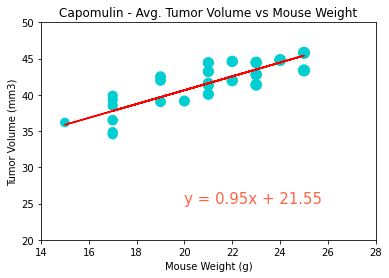

In [28]:
# Calculate the correlation coefficient and linear regression model between mouse weight and average tumor 
#  volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

# # Isolate Capomulin into a dataframe
# capomulin_df = mouse_df_cl.loc[mouse_df_cl['Drug Regimen'] == 'Capomulin']

# # Find the average tumor volume by mouse and create a dataframe
# tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())

# # Merge the dataframes
# cap_tv_df = pd.merge(capomulin_df, tumor_vol_df, on=['Tumor Volume (mm3)'], how='left')
# cap_mouse_df_cl = mouse_df_cl.loc[mouse_df_cl['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean()


# Assign variables
x = cap_mouse_df_cl['Weight (g)']
y = cap_mouse_df_cl['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation = st.pearsonr(x, y)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}. The correlation is positive with moderate stregnth.")

# Linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Creat the scatter plot
plt.scatter(x, y, marker="o", s = cap_mouse_df_cl['Weight (g)']*5, facecolors="darkturquoise", edgecolors="darkturquoise")
plt.plot(x,regress_values,"r-")

# Annotate the linear regression
plt.annotate(line_eq,(20,25),fontsize=15,color="tomato")

# # Set limits on x and y axis
plt.xlim(14, 28)
plt.ylim(20, 50)

# Add labels
plt.title("Capomulin - Avg. Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()